<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-27 20:17:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  66.9MB/s    in 3.0s    

2025-04-27 20:17:57 (66.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


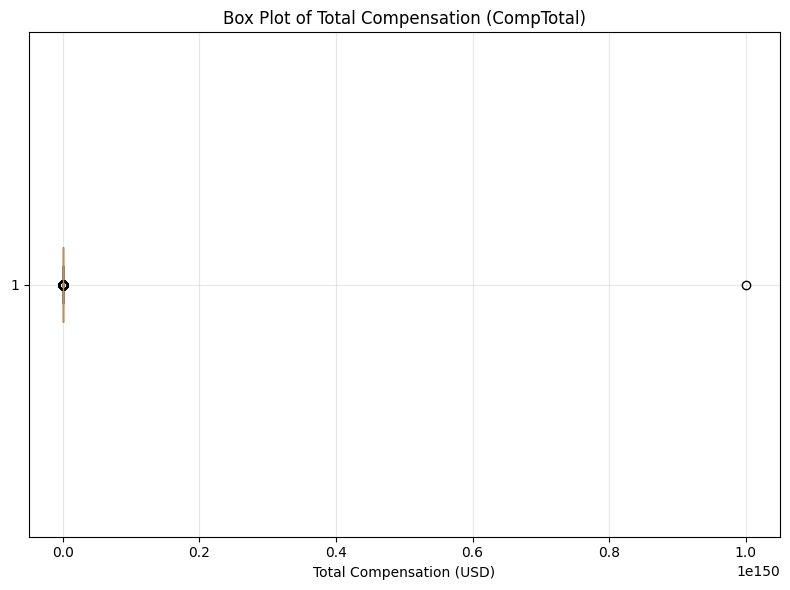

In [8]:
# your code goes here
# Query CompTotal from the database
QUERY = """
SELECT CompTotal
FROM main
"""
df_comp_total = pd.read_sql_query(QUERY, conn)

# Drop missing values
df_comp_total = df_comp_total.dropna()

# Plot box plot for CompTotal
plt.figure(figsize=(8,6))
plt.boxplot(df_comp_total['CompTotal'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


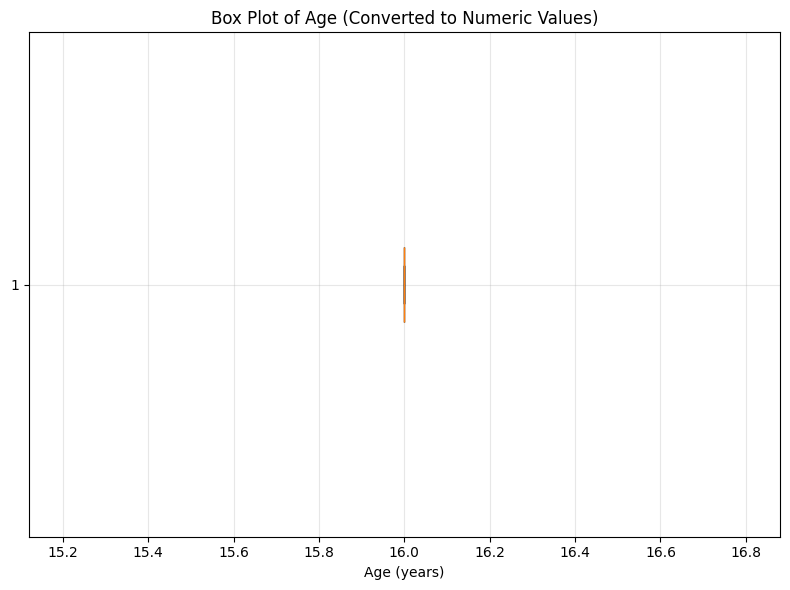

In [10]:
# Query Age column from the database
QUERY = """
SELECT Age
FROM main
"""
df_age = pd.read_sql_query(QUERY, conn)

# Function to convert Age range to a numerical value (midpoint of the range)
def convert_age_to_numeric(age_range):
    # Check for invalid or missing values
    if 'Under' in age_range:
        return 16  # For ages "Under 18 years old"
    elif 'Over' in age_range:
        return 65  # For ages "65 or older"
    elif 'Prefer' in age_range:  # Handle cases like "Prefer not to answer"
        return None
    else:
        try:
            # Extract the starting value of the age range and calculate the midpoint
            age_start = int(age_range.split('-')[0])
            age_end = int(age_range.split('-')[1])
            return (age_start + age_end) / 2  # Return the midpoint of the age range
        except:
            return None  # Return None if the age value is invalid or cannot be parsed

# Apply the function to convert Age to numeric values
df_age['Age_numeric'] = df_age['Age'].apply(convert_age_to_numeric)

# Drop rows where Age_numeric is None (invalid or missing data)
df_age = df_age.dropna(subset=['Age_numeric'])

# Plot box plot for Age distribution
plt.figure(figsize=(8,6))
plt.boxplot(df_age['Age_numeric'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))
plt.title('Box Plot of Age (Converted to Numeric Values)')
plt.xlabel('Age (years)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


Text(0.5, 0.98, '')

<Figure size 1000x600 with 0 Axes>

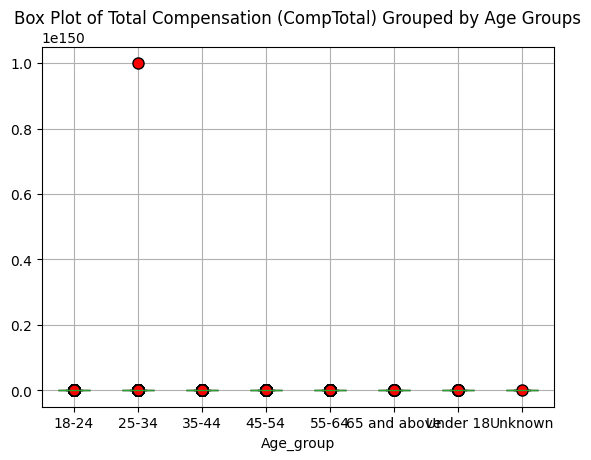

In [12]:
# your code goes here
# Query Age and CompTotal from the database
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Function to convert Age ranges into age group categories
def convert_age_group(age_range):
    if 'Under' in age_range:
        return 'Under 18'
    elif '18-24' in age_range:
        return '18-24'
    elif '25-34' in age_range:
        return '25-34'
    elif '35-44' in age_range:
        return '35-44'
    elif '45-54' in age_range:
        return '45-54'
    elif '55-64' in age_range:
        return '55-64'
    elif '65' in age_range or 'Over' in age_range:
        return '65 and above'
    else:
        return 'Unknown'

# Apply the function to convert Age to a group category
df_age_comp['Age_group'] = df_age_comp['Age'].apply(convert_age_group)

# Drop missing values for CompTotal and Age_group
df_age_comp = df_age_comp.dropna(subset=['CompTotal', 'Age_group'])

# Plot a box plot of CompTotal grouped by Age groups
plt.figure(figsize=(10,6))
df_age_comp.boxplot(column='CompTotal', by='Age_group', patch_artist=True, 
                    boxprops=dict(facecolor='lightblue', color='black'),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Age Groups')
plt.suptitle('')  # Remove the


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

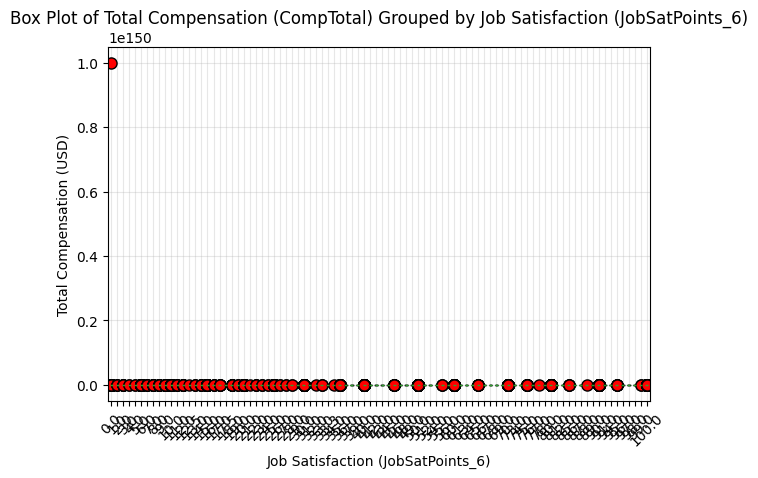

In [13]:
# your code goes here
# Query JobSatPoints_6 and CompTotal from the database
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
"""
df_job_sat_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values for both JobSatPoints_6 and CompTotal
df_job_sat_comp = df_job_sat_comp.dropna(subset=['JobSatPoints_6', 'CompTotal'])

# Plot a box plot of CompTotal grouped by JobSatPoints_6
plt.figure(figsize=(10,6))
df_job_sat_comp.boxplot(column='CompTotal', by='JobSatPoints_6', patch_artist=True, 
                        boxprops=dict(facecolor='lightcoral', color='black'),
                        flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Job Satisfaction (JobSatPoints_6)')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Total Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

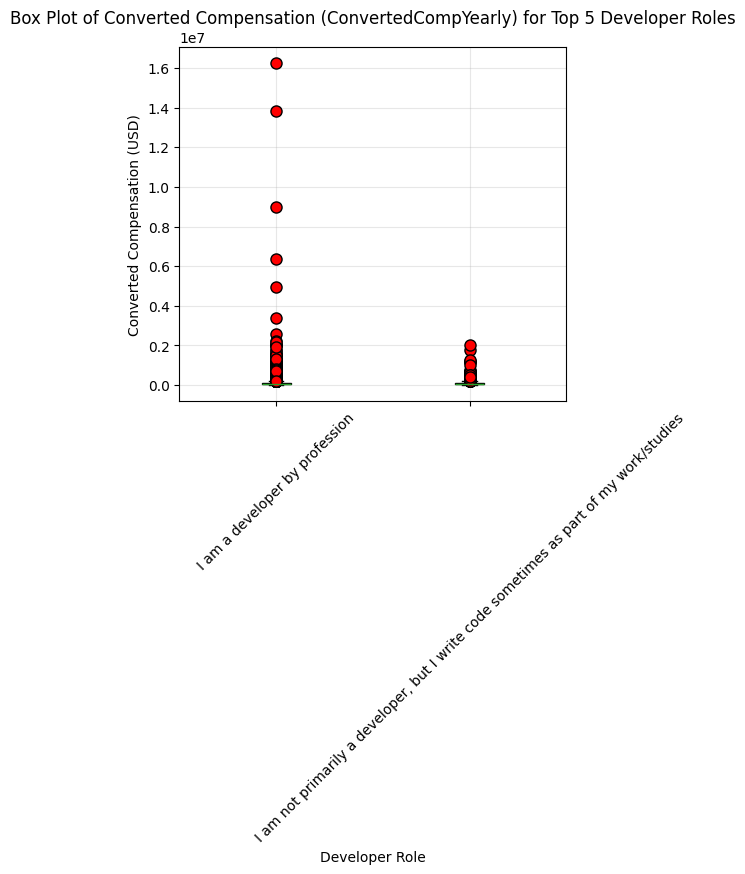

In [14]:
# your code goes here
# Query MainBranch (developer roles) and ConvertedCompYearly (compensation) from the database
QUERY = """
SELECT MainBranch, ConvertedCompYearly
FROM main
"""
df_dev_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values for both MainBranch and ConvertedCompYearly
df_dev_comp = df_dev_comp.dropna(subset=['MainBranch', 'ConvertedCompYearly'])

# Get the top 5 developer roles based on frequency
top_5_roles = df_dev_comp['MainBranch'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 developer roles
df_top_5_roles = df_dev_comp[df_dev_comp['MainBranch'].isin(top_5_roles)]

# Plot a box plot of ConvertedCompYearly grouped by developer role (MainBranch)
plt.figure(figsize=(12,6))
df_top_5_roles.boxplot(column='ConvertedCompYearly', by='MainBranch', patch_artist=True, 
                        boxprops=dict(facecolor='lightseagreen', color='black'),
                        flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Box Plot of Converted Compensation (ConvertedCompYearly) for Top 5 Developer Roles')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.xlabel('Developer Role')
plt.ylabel('Converted Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

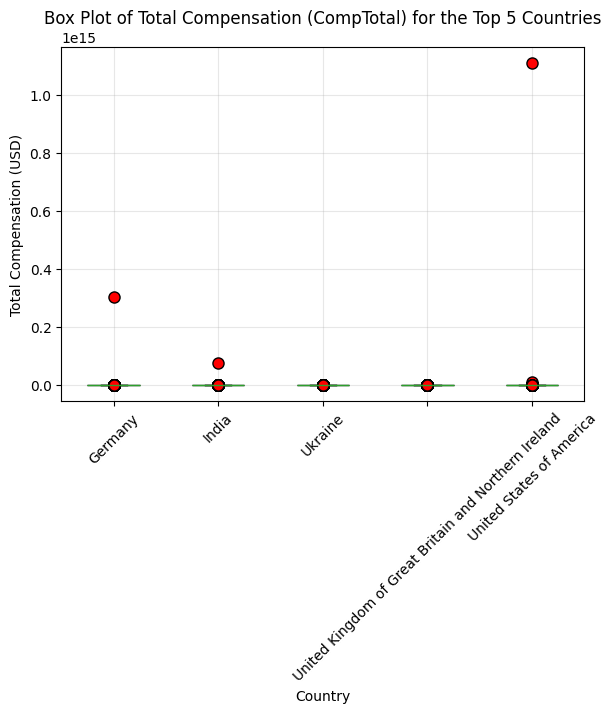

In [15]:
# your code goes here
# Query Country and CompTotal from the database
QUERY = """
SELECT Country, CompTotal
FROM main
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values for both Country and CompTotal
df_country_comp = df_country_comp.dropna(subset=['Country', 'CompTotal'])

# Get the top 5 countries based on the number of respondents
top_5_countries = df_country_comp['Country'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 countries
df_top_5_countries = df_country_comp[df_country_comp['Country'].isin(top_5_countries)]

# Plot a box plot of CompTotal grouped by Country
plt.figure(figsize=(12,6))
df_top_5_countries.boxplot(column='CompTotal', by='Country', patch_artist=True, 
                            boxprops=dict(facecolor='lightblue', color='black'),
                            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Box Plot of Total Compensation (CompTotal) for the Top 5 Countries')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_862/3501850744.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

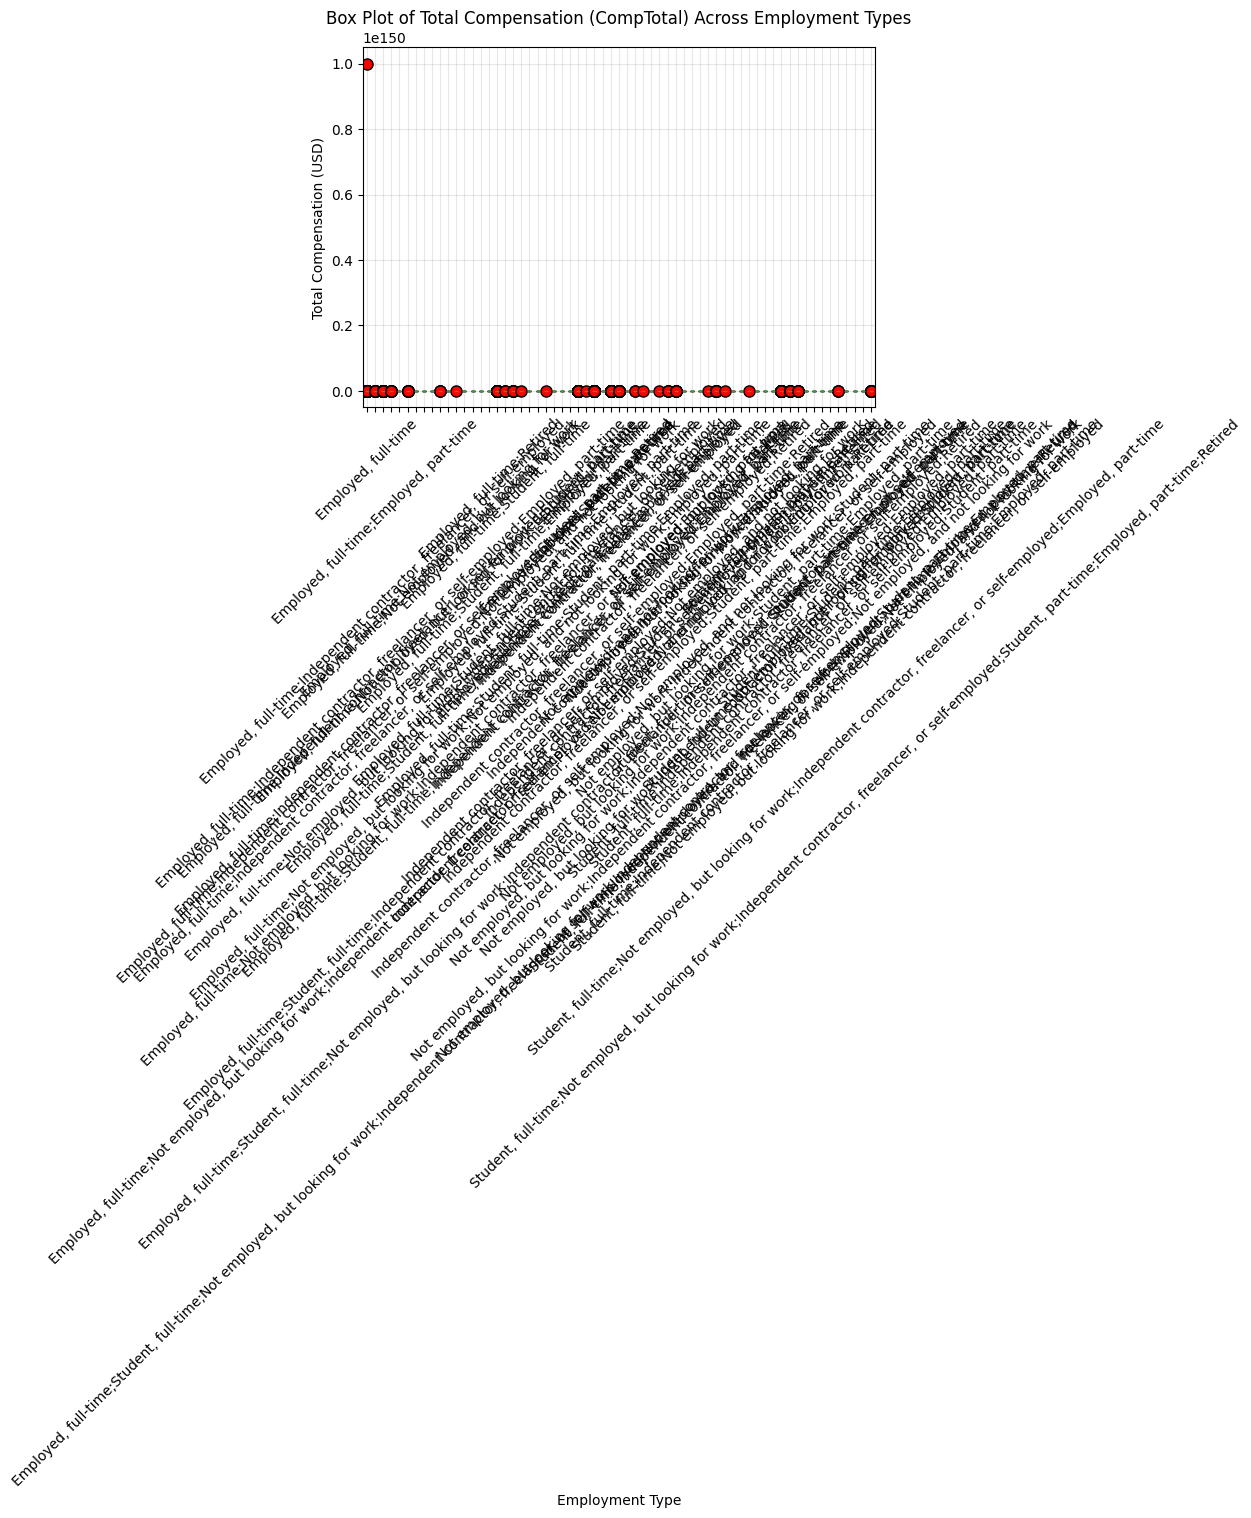

In [16]:
# your code goes here
# Query Employment and CompTotal from the database
QUERY = """
SELECT Employment, CompTotal
FROM main
"""
df_emp_comp = pd.read_sql_query(QUERY, conn)

# Drop missing values for both Employment and CompTotal
df_emp_comp = df_emp_comp.dropna(subset=['Employment', 'CompTotal'])

# Plot a box plot of CompTotal grouped by Employment type
plt.figure(figsize=(12,6))
df_emp_comp.boxplot(column='CompTotal', by='Employment', patch_artist=True, 
                    boxprops=dict(facecolor='lightyellow', color='black'),
                    flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Box Plot of Total Compensation (CompTotal) Across Employment Types')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

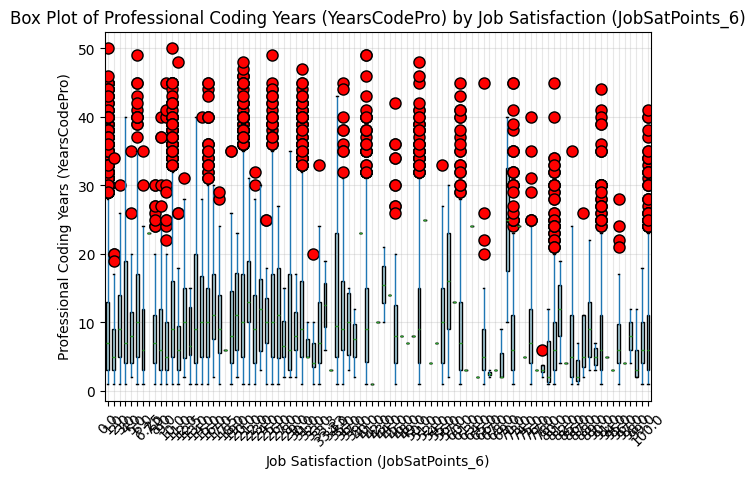

In [18]:
# Query YearsCodePro and JobSatPoints_6 from the database
QUERY = """
SELECT JobSatPoints_6, YearsCodePro
FROM main
"""
df_job_sat_exp = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric (forcing errors to NaN)
df_job_sat_exp['YearsCodePro'] = pd.to_numeric(df_job_sat_exp['YearsCodePro'], errors='coerce')

# Drop rows with NaN values in either column (if conversion fails)
df_job_sat_exp = df_job_sat_exp.dropna(subset=['JobSatPoints_6', 'YearsCodePro'])

# Plot a box plot of YearsCodePro grouped by JobSatPoints_6 (Job Satisfaction)
plt.figure(figsize=(12,6))
df_job_sat_exp.boxplot(column='YearsCodePro', by='JobSatPoints_6', patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', color='black'),
                       flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

plt.title('Box Plot of Professional Coding Years (YearsCodePro) by Job Satisfaction (JobSatPoints_6)')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Professional Coding Years (YearsCodePro)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
